In [87]:
import pandas as pd
import numpy as np 
import seaborn as snb 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import silhouette_score




##  Load the Data 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/foxdocs/cph-bi-2024/refs/heads/main/Data/shopping-data.csv")
ds = pd.read_csv("https://raw.githubusercontent.com/foxdocs/cph-bi-2024/refs/heads/main/Data/sales.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
ds.head()

,Store id,Tshirt,Tank top,Halter top,Turtleneck,Tube top,Sweater
0,1,12449,8735,7351,203,2528,1269
1,2,6528,10103,9835,1664,3411,1737
2,3,6231,9223,8083,2631,3774,7394
3,4,13502,1089,4174,6478,468,1811
4,5,24078,5067,7902,3714,1932,5360


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Store id    440 non-null    int64
 1   Tshirt      440 non-null    int64
 2   Tank top    440 non-null    int64
 3   Halter top  440 non-null    int64
 4   Turtleneck  440 non-null    int64
 5   Tube top    440 non-null    int64
 6   Sweater     440 non-null    int64
dtypes: int64(7)
memory usage: 24.2 KB


In [8]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
ds.columns

Index(['Store id', 'Tshirt', 'Tank top', 'Halter top', 'Turtleneck',
       'Tube top', 'Sweater'],
      dtype='object')

In [10]:
df.shape

(200, 5)

In [11]:
ds.shape

(440, 7)

## Data Cleaning

In [12]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
ds.isnull().sum()

Store id      0
Tshirt        0
Tank top      0
Halter top    0
Turtleneck    0
Tube top      0
Sweater       0
dtype: int64

In [14]:
df.dropna() 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [15]:
df.drop_duplicates()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [16]:
ds.drop_duplicates()

,Store id,Tshirt,Tank top,Halter top,Turtleneck,Tube top,Sweater
0,1,12449,8735,7351,203,2528,1269
1,2,6528,10103,9835,1664,3411,1737
2,3,6231,9223,8083,2631,3774,7394
3,4,13502,1089,4174,6478,468,1811
4,5,24078,5067,7902,3714,1932,5360
...,...,...,...,...,...,...,...
435,436,30514,11242,15558,12267,177,2400
436,437,38708,1517,694,4320,101,2499
437,438,13302,15463,29256,416,15433,2041
438,439,10004,1989,2282,1027,160,2022


In [17]:
df.fillna(value=0, inplace=True)

In [18]:
ds.fillna(value=0, inplace=True)

## Exploratory Data Analysis (EDA)

In [19]:
ds.describe().round()

,Store id,Tshirt,Tank top,Halter top,Turtleneck,Tube top,Sweater
count,440.0,440.0,440.0,440.0,440.0,440.0,440.0
mean,220.0,11960.0,5808.0,8003.0,3068.0,2881.0,1530.0
std,127.0,12471.0,7386.0,9603.0,5007.0,4739.0,2952.0
min,1.0,2.0,55.0,3.0,25.0,2.0,2.0
25%,111.0,3139.0,1552.0,2102.0,727.0,254.0,398.0
50%,220.0,8179.0,3666.0,4792.0,1562.0,792.0,952.0
75%,330.0,16854.0,7212.0,10385.0,3552.0,3873.0,1802.0
max,440.0,104972.0,77873.0,97393.0,66900.0,40066.0,50710.0


In [20]:
df.describe().round()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.0,200.0,200.0,200.0
mean,100.0,39.0,61.0,50.0
std,58.0,14.0,26.0,26.0
min,1.0,18.0,15.0,1.0
25%,51.0,29.0,42.0,35.0
50%,100.0,36.0,62.0,50.0
75%,150.0,49.0,78.0,73.0
max,200.0,70.0,137.0,99.0


In [21]:
df.value_counts()

CustomerID  Genre   Age  Annual Income (k$)  Spending Score (1-100)
1           Male    19   15                  39                        1
138         Male    32   73                  73                        1
128         Male    40   71                  95                        1
129         Male    59   71                  11                        1
130         Male    38   71                  75                        1
                                                                      ..
70          Female  32   48                  47                        1
71          Male    70   49                  55                        1
72          Female  47   49                  42                        1
73          Female  60   50                  49                        1
200         Male    30   137                 83                        1
Name: count, Length: 200, dtype: int64

In [22]:
ds.value_counts()

Store id  Tshirt  Tank top  Halter top  Turtleneck  Tube top  Sweater
1         12449   8735      7351        203         2528      1269       1
290       42136   285       504         1370        34        20         1
301       16213   6173      6566        868         2922      2121       1
300       407     909       1909        266         303       279        1
299       6264    4446      10273       1013        4693      978        1
                                                                        ..
144       10140   1487      1195        9172        360       312        1
143       33970   7163      7663        3050        19        3          1
142       32320   12348     5574        324         54        1576       1
141       16783   4148      7287        2140        1006      2868       1
440       2550    1670      2510        69          462       55         1
Name: count, Length: 440, dtype: int64

## Feature Engineering

In [23]:
#(tilføjer Total Sales kolonnen)
ds['Total Sales'] = ds.iloc[:, 1:].sum(axis=1)

In [24]:
ds.columns

Index(['Store id', 'Tshirt', 'Tank top', 'Halter top', 'Turtleneck',
       'Tube top', 'Sweater', 'Total Sales'],
      dtype='object')

In [25]:
##(sammenfletning af shopping data og sales data)
df['Store id'] = np.random.choice(ds['Store id'], size=len(df), replace=True)
combined_data = pd.merge(df, ds[['Store id', 'Total Sales']], on='Store id', how='left')

In [26]:
combined_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Store id,Total Sales
0,1,Male,19,15,39,3,37336
1,2,Male,21,15,81,67,12329
2,3,Female,20,16,6,321,9539
3,4,Female,23,16,77,395,18137
4,5,Female,31,17,40,271,12417


In [27]:
df['Income/Spending'] = df['Annual Income (k$)'] / df['Spending Score (1-100)']


In [28]:
df['Log_Annual_Income'] = np.log(df['Annual Income (k$)'] + 1)

In [29]:
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])


In [30]:
df = pd.get_dummies(df, columns=['Genre'], drop_first=True)

In [31]:
df.head(10)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Store id,Income/Spending,Log_Annual_Income,Age_Group,Genre_Male
0,1,19,15,39,3,0.384615,2.772589,18-25,True
1,2,21,15,81,67,0.185185,2.772589,18-25,True
2,3,20,16,6,321,2.666667,2.833213,18-25,False
3,4,23,16,77,395,0.207792,2.833213,18-25,False
4,5,31,17,40,271,0.425000,2.890372,26-35,False
5,6,22,17,76,262,0.223684,2.890372,18-25,False
6,7,35,18,6,115,3.000000,2.944439,26-35,False
7,8,23,18,94,153,0.191489,2.944439,18-25,False
8,9,64,19,3,222,6.333333,2.995732,56-65,True
9,10,30,19,72,280,0.263889,2.995732,26-35,False


In [32]:
df['Transaction_Date'] = pd.to_datetime(np.random.choice(pd.date_range('2018-01-01', '2024-12-31'), size=len(df)))

In [33]:
df.head(10)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Store id,Income/Spending,Log_Annual_Income,Age_Group,Genre_Male,Transaction_Date
0,1,19,15,39,3,0.384615,2.772589,18-25,True,2022-04-23
1,2,21,15,81,67,0.185185,2.772589,18-25,True,2022-09-11
2,3,20,16,6,321,2.666667,2.833213,18-25,False,2022-06-25
3,4,23,16,77,395,0.207792,2.833213,18-25,False,2019-05-29
4,5,31,17,40,271,0.425000,2.890372,26-35,False,2023-09-27
5,6,22,17,76,262,0.223684,2.890372,18-25,False,2020-08-22
6,7,35,18,6,115,3.000000,2.944439,26-35,False,2021-08-25
7,8,23,18,94,153,0.191489,2.944439,18-25,False,2022-08-02
8,9,64,19,3,222,6.333333,2.995732,56-65,True,2022-05-30
9,10,30,19,72,280,0.263889,2.995732,26-35,False,2018-08-18


In [34]:
df['datayear'] = df['Transaction_Date'].dt.year

In [35]:
df.head(10)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Store id,Income/Spending,Log_Annual_Income,Age_Group,Genre_Male,Transaction_Date,datayear
0,1,19,15,39,3,0.384615,2.772589,18-25,True,2022-04-23,2022
1,2,21,15,81,67,0.185185,2.772589,18-25,True,2022-09-11,2022
2,3,20,16,6,321,2.666667,2.833213,18-25,False,2022-06-25,2022
3,4,23,16,77,395,0.207792,2.833213,18-25,False,2019-05-29,2019
4,5,31,17,40,271,0.425000,2.890372,26-35,False,2023-09-27,2023
5,6,22,17,76,262,0.223684,2.890372,18-25,False,2020-08-22,2020
6,7,35,18,6,115,3.000000,2.944439,26-35,False,2021-08-25,2021
7,8,23,18,94,153,0.191489,2.944439,18-25,False,2022-08-02,2022
8,9,64,19,3,222,6.333333,2.995732,56-65,True,2022-05-30,2022
9,10,30,19,72,280,0.263889,2.995732,26-35,False,2018-08-18,2018


In [36]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Store id', 'Income/Spending', 'Log_Annual_Income', 'Age_Group',
       'Genre_Male', 'Transaction_Date', 'datayear'],
      dtype='object')

In [37]:
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(df[['Spending Score (1-100)', 'Annual Income (k$)']])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['Spending Score (1-100)', 'Annual Income (k$)']))
df = pd.concat([df, poly_df], axis=1)

In [38]:
print("Polynomiske features:")
print(poly_df.head())

Polynomiske features:
     1  Spending Score (1-100)  Annual Income (k$)  Spending Score (1-100)^2  \
0  1.0                    39.0                15.0                    1521.0   
1  1.0                    81.0                15.0                    6561.0   
2  1.0                     6.0                16.0                      36.0   
3  1.0                    77.0                16.0                    5929.0   
4  1.0                    40.0                17.0                    1600.0   

   Spending Score (1-100) Annual Income (k$)  Annual Income (k$)^2  
0                                      585.0                 225.0  
1                                     1215.0                 225.0  
2                                       96.0                 256.0  
3                                     1232.0                 256.0  
4                                      680.0                 289.0  


In [39]:
df1 = pd.merge(df, ds, on='Store id', how='left')

In [40]:
df1.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Store id,Income/Spending,Log_Annual_Income,Age_Group,Genre_Male,Transaction_Date,...,Spending Score (1-100)^2,Spending Score (1-100) Annual Income (k$),Annual Income (k$)^2,Tshirt,Tank top,Halter top,Turtleneck,Tube top,Sweater,Total Sales
0,1,19,15,39,3,0.384615,2.772589,18-25,True,2022-04-23,...,1521.0,585.0,225.0,6231,9223,8083,2631,3774,7394,37336
1,2,21,15,81,67,0.185185,2.772589,18-25,True,2022-09-11,...,6561.0,1215.0,225.0,9,1494,7166,190,3442,28,12329
2,3,20,16,6,321,2.666667,2.833213,18-25,False,2022-06-25,...,36.0,96.0,256.0,1642,4021,2307,530,253,786,9539
3,4,23,16,77,395,0.207792,2.833213,18-25,False,2019-05-29,...,5929.0,1232.0,256.0,12045,899,3077,1488,139,489,18137
4,5,31,17,40,271,0.425000,2.890372,26-35,False,2023-09-27,...,1600.0,680.0,289.0,4676,964,1006,5520,194,57,12417


## Supervised Learning 

In [41]:
df1.columns


Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Store id', 'Income/Spending', 'Log_Annual_Income', 'Age_Group',
       'Genre_Male', 'Transaction_Date', 'datayear', '1',
       'Spending Score (1-100)', 'Annual Income (k$)',
       'Spending Score (1-100)^2', 'Spending Score (1-100) Annual Income (k$)',
       'Annual Income (k$)^2', 'Tshirt', 'Tank top', 'Halter top',
       'Turtleneck', 'Tube top', 'Sweater', 'Total Sales'],
      dtype='object')

In [42]:
# Fjern eventuelle gentagne kolonner
df1 = df1.loc[:, ~df1.columns.duplicated()]

# Bekræft at gentagne kolonner er blevet fjernet ved at udskrive kolonnenavne
print(df1.columns)

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Store id', 'Income/Spending', 'Log_Annual_Income', 'Age_Group',
       'Genre_Male', 'Transaction_Date', 'datayear', '1',
       'Spending Score (1-100)^2', 'Spending Score (1-100) Annual Income (k$)',
       'Annual Income (k$)^2', 'Tshirt', 'Tank top', 'Halter top',
       'Turtleneck', 'Tube top', 'Sweater', 'Total Sales'],
      dtype='object')


In [43]:
df1 = df1.drop(columns=['Store id'])

In [44]:
# Opret en syntetisk "Attrition"-kolonne
# Antag at folk med høj indkomst og lav spending score er mere tilbøjelige til at forlade
df1['Attrition'] = np.where((df1['Annual Income (k$)'].values.flatten() > 70) & 
                            (df1['Spending Score (1-100)'].values.flatten() < 40), 1, 0)

# Bekræft at kolonnen er blevet tilføjet korrekt ved at udskrive de første rækker
df1[['Annual Income (k$)', 'Spending Score (1-100)', 'Attrition']].head()

,Annual Income (k$),Spending Score (1-100),Attrition
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0


In [45]:
df1[df1['Attrition'] == 1].head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income/Spending,Log_Annual_Income,Age_Group,Genre_Male,Transaction_Date,datayear,...,Spending Score (1-100) Annual Income (k$),Annual Income (k$)^2,Tshirt,Tank top,Halter top,Turtleneck,Tube top,Sweater,Total Sales,Attrition
126,127,43,71,35,2.028571,4.276666,36-45,True,2023-12-15,2023,...,2485.0,5041.0,4676,964,1006,5520,194,57,12417,1
128,129,59,71,11,6.454545,4.276666,56-65,True,2020-12-18,2020,...,781.0,5041.0,7207,5211,10362,1598,3641,2700,30719,1
130,131,47,71,9,7.888889,4.276666,46-55,True,2019-07-08,2019,...,639.0,5041.0,7864,3957,2189,5716,960,271,20957,1
132,133,25,72,34,2.117647,4.290459,18-25,False,2021-04-26,2021,...,2448.0,5184.0,20090,1267,3628,3088,659,836,29568,1
134,135,20,73,5,14.600000,4.304065,18-25,True,2018-08-29,2018,...,365.0,5329.0,9942,23016,16175,3671,259,4771,57834,1


In [46]:
# Fjern unødvendige kolonner (fx 'CustomerID', da de ikke bruges i klassifikation)
X = df1.drop(columns=['Attrition', 'CustomerID'])  # Features uden målet 'Attrition'
y = df1['Attrition']  # Målvariabel (Attrition)

In [47]:
# Del data i trænings- og testdatasæt (70% træning, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [48]:
X_train.dtypes


Age                                                   int64
Annual Income (k$)                                    int64
Spending Score (1-100)                                int64
Income/Spending                                     float64
Log_Annual_Income                                   float64
Age_Group                                          category
Genre_Male                                             bool
Transaction_Date                             datetime64[ns]
datayear                                              int32
1                                                   float64
Spending Score (1-100)^2                            float64
Spending Score (1-100) Annual Income (k$)           float64
Annual Income (k$)^2                                float64
Tshirt                                                int64
Tank top                                              int64
Halter top                                            int64
Turtleneck                              

In [49]:
# Konverter kategoriske kolonner til numeriske (one-hot encoding for 'Age_Group')
X_train = pd.get_dummies(X_train, columns=['Age_Group'])

# Konverter boolske kolonner (Genre_Male) til numerisk form
X_train['Genre_Male'] = X_train['Genre_Male'].astype(int)
X_test['Genre_Male'] = X_test['Genre_Male'].astype(int)

# Konverter datetime kolonnen 'Transaction_Date' til numeriske værdier (fx år)
X_train['Transaction_Year'] = X_train['Transaction_Date'].dt.year
X_test['Transaction_Year'] = X_test['Transaction_Date'].dt.year

# Fjern 'Transaction_Date' efter konvertering, da vi nu har 'Transaction_Year'
X_train = X_train.drop(columns=['Transaction_Date'])
X_test = X_test.drop(columns=['Transaction_Date'])


In [50]:
# Initialiser og træn en Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [51]:
# Sørg for, at X_train og X_test har de samme kolonner efter one-hot encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [52]:
# Forudsig på testdatasæt
y_pred = model.predict(X_test)

In [53]:
# Evaluer modellens ydeevne
accuracy = accuracy_score(y_test, y_pred)
f"Model Accuracy: {accuracy}"

'Model Accuracy: 0.9666666666666667'

In [54]:
# Klassifikationsrapport og forvirringsmatrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        46
           1       0.93      0.93      0.93        14

    accuracy                           0.97        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.97      0.97      0.97        60



In [55]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[45  1]
 [ 1 13]]


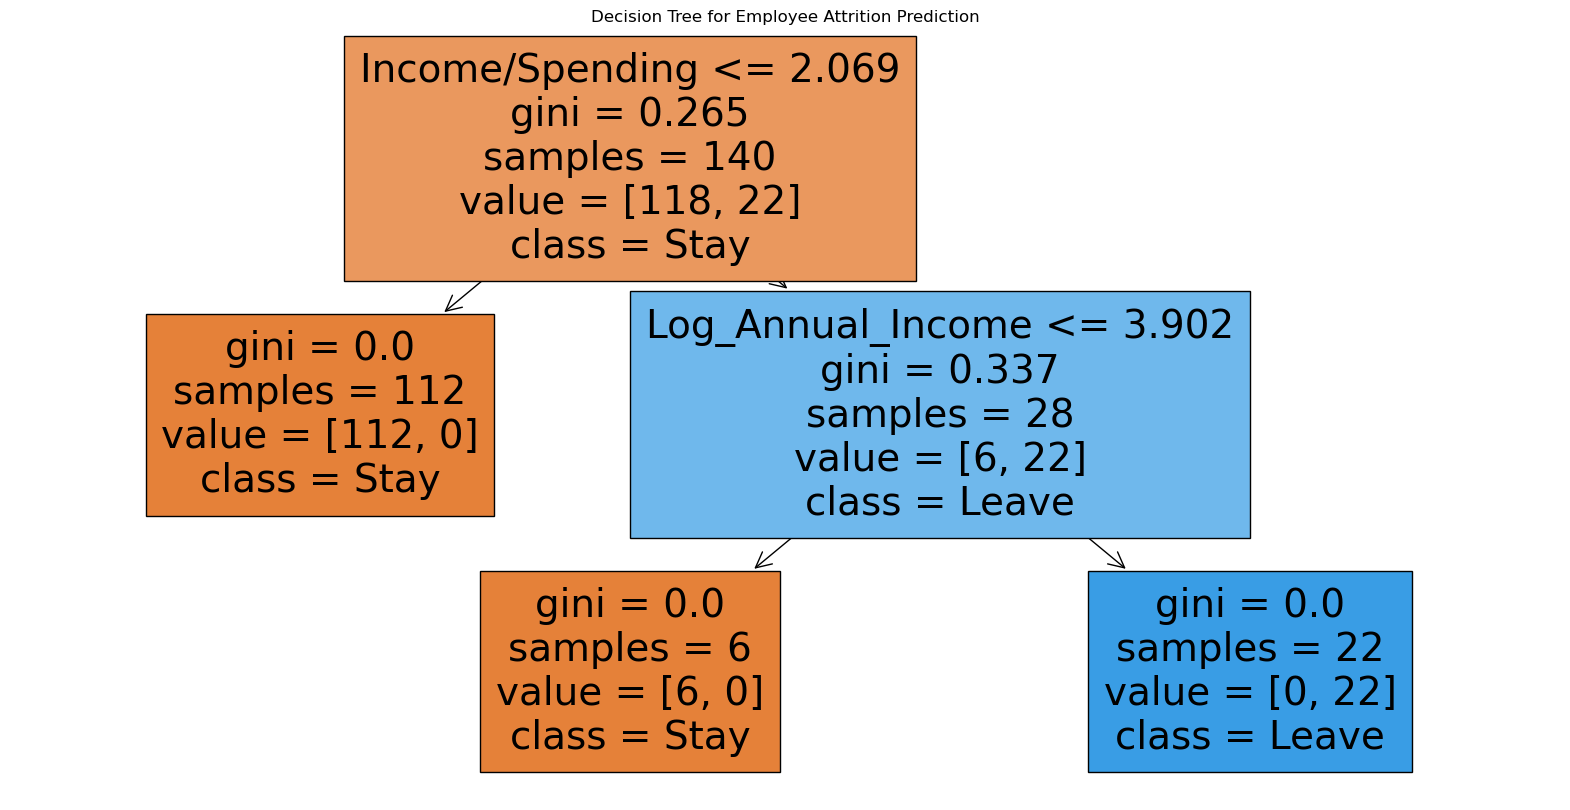

In [56]:
# 1. Decision Tree Visualization
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X_train.columns, class_names=['Stay', 'Leave'], filled=True)
plt.title('Decision Tree for Employee Attrition Prediction')
plt.show()

In [57]:
#Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)

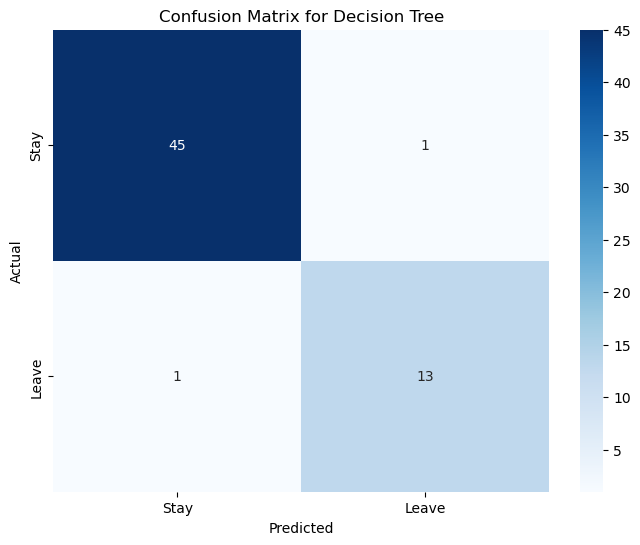

In [58]:
plt.figure(figsize=(8,6))
snb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [68]:
# Vælg de relevante numeriske features fra df1
features = df1[[ 'Annual Income (k$)', 'Spending Score (1-100)']]

In [69]:
# Standardiser dataene
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [72]:
# Kør K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Du kan ændre antallet af klynger
kmeans.fit(features_scaled)

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [73]:
# Hent klyngetildelinger fra K-means
cluster_labels = kmeans.labels_

In [74]:
# Reducer dataene til 2 komponenter ved brug af PCA for at visualisere clustering
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

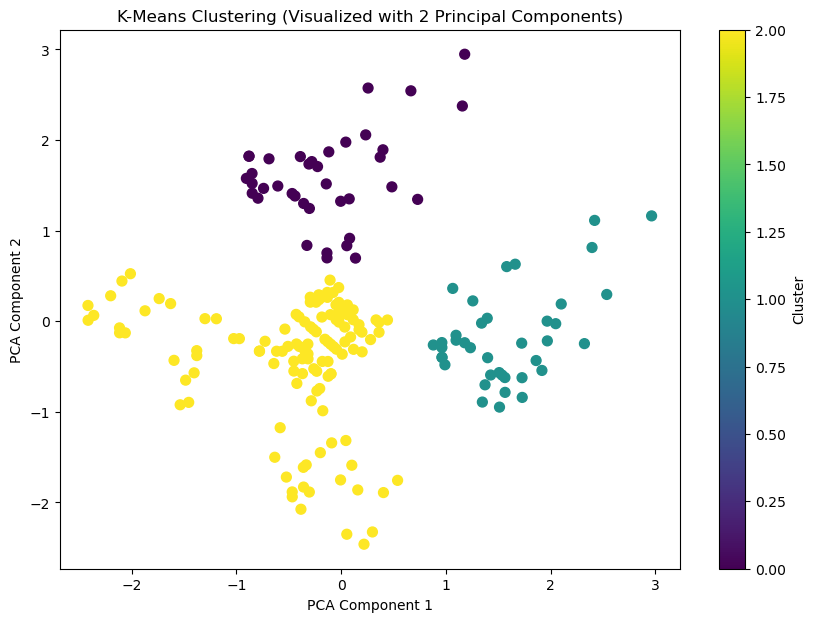

In [75]:
# Plot klyngerne i 2D baseret på PCA
plt.figure(figsize=(10,7))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering (Visualized with 2 Principal Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [79]:
# Evaluer modellen
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)  # Ændret til 1
recall = recall_score(y_test, y_pred, pos_label=1)        # Ændret til 1
f1 = f1_score(y_test, y_pred, pos_label=1)                # Ændret til 1

In [80]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [81]:
print(f"Precision: {precision:.2f}")

Precision: 0.93


In [82]:
print(f"Recall: {recall:.2f}")

Recall: 0.93


In [83]:
print(f"F1-score: {f1:.2f}")

F1-score: 0.93


In [85]:
# Klassifikationsrapport for yderligere detaljer
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.98      0.98      0.98        46
         Yes       0.93      0.93      0.93        14

    accuracy                           0.97        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.97      0.97      0.97        60

